Pajarilla, Gliezel Ann                    
Machine Learning - CMSC 197

In [8]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


# Loading the advertising dataset

In [9]:
#### Utilized google colab
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [105]:
#### Assigned to df
df = pd.read_csv('Advertising.csv', index_col = 0)

print("size:", df.shape)
df.head()

size: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [106]:
##### Visualize the summary of the data statistics
df.describe()
#df.info()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing the dataset with the features (x) and the response (y)

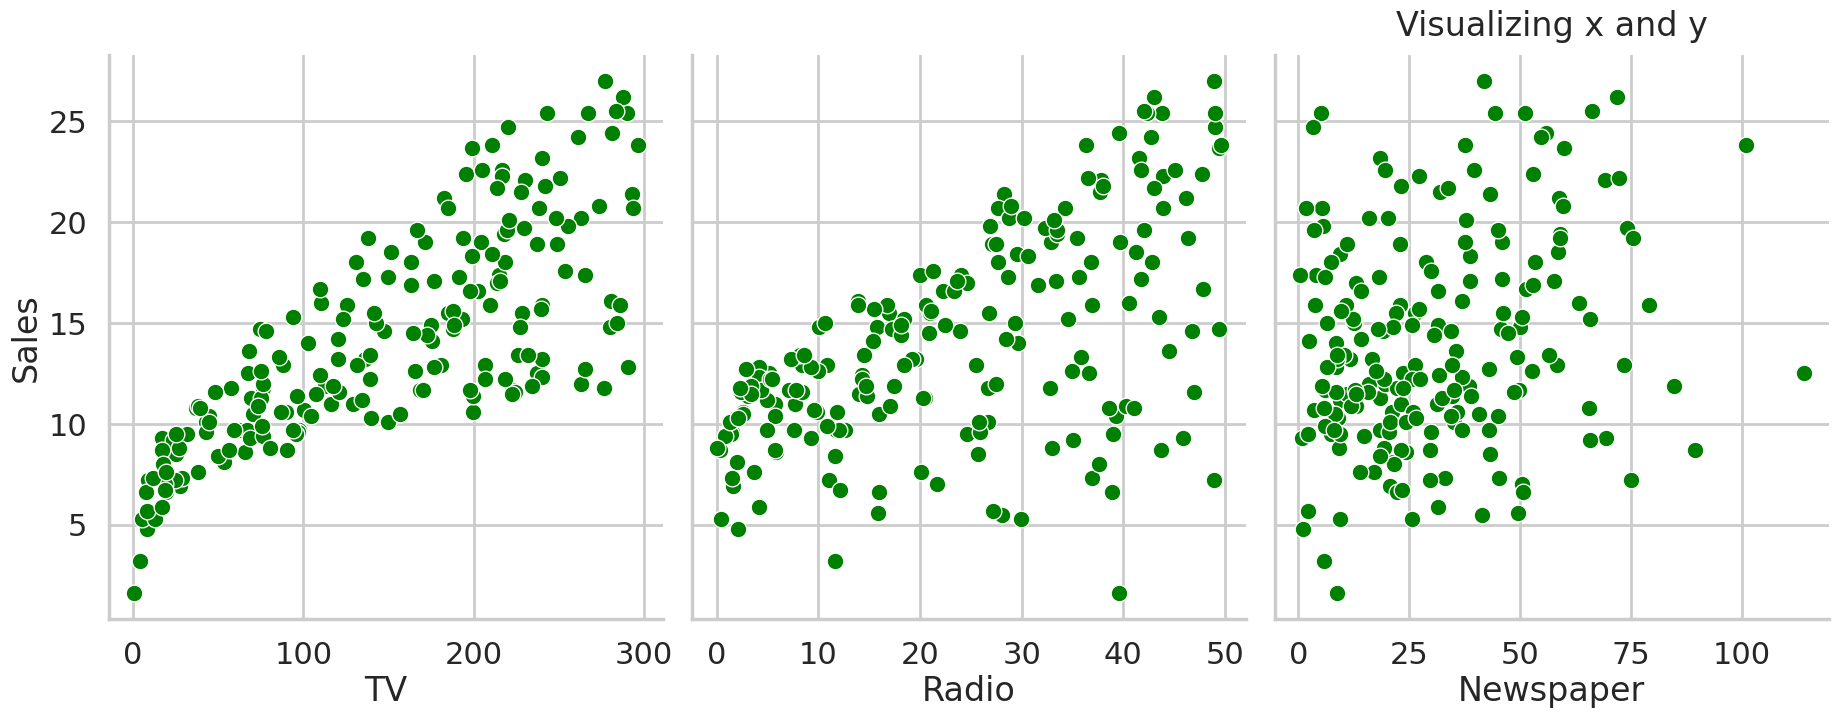

In [107]:
#### Visualize the relationship using scatterplot
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7,aspect=0.9, plot_kws={'color': 'green'})
plt.title('Visualizing x and y', y = 1.02, ha='center')
plt.show()

# Standardization using sklearn

In [108]:
#### Used the sklearn's preprocessing.scale function
from sklearn import preprocessing
df_std = preprocessing.scale(df)

#### Standardized data to dataframe
df_std = pd.DataFrame(df_std, columns = df.columns)
df_std.head(5)

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


# Add a column of all ones

In [109]:
#### Add 1 for the bias
if 'bias' not in df_std.columns:
    df_std.insert(0, 'bias', 1)
df_std.head(5)

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683


# Storing variables x and y

In [110]:
# Separate the features (x) and the target variable (y)
x = df_std[['bias', 'TV', 'Radio', 'Newspaper']]
y = df_std['Sales']


print(x.head(3))
print(y.head(3))

   bias        TV     Radio  Newspaper
0     1  0.969852  0.981522   1.778945
1     1 -1.197376  1.082808   0.669579
2     1 -1.516155  1.528463   1.783549
0    1.552053
1   -0.696046
2   -0.907406
Name: Sales, dtype: float64


# Dataset was divided into training and testing sets

In [114]:
#### Splitting the dataset
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15 ,random_state = 42)

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_test size:",x_test.shape)
print("y_test size:",y_test.shape)

x_train size: (170, 4)
y_train size: (170,)
x_test size: (30, 4)
y_test size: (30,)


# Fitting the model on the training set

# Required Functions (Elaborated version of item 5 above)

### (1) Initialized the weights

In [112]:
##### Sets initial weights for a mode ,
##### if random = true, weight = rand val & false, weight = 0
def initialize_weights(x, random = False):
    x_length = x.shape[1]
    if random:
        return np.random.rand(x_length)
    return np.zeros(x_length)

In [115]:
#### Displaying when weights is random and if not
weights_rand = initialize_weights(x_train, random = True)
print(f'Random: {weights_rand}')

#### Zero
weights_zero = initialize_weights(x_train)
print(f'Not random: {weights_zero}')

Random: [0.80178479 0.09817977 0.89464665 0.49517066]
Not random: [0. 0. 0. 0.]


### (2) Predict function displaying predicted values

In [116]:
#### Calculates the predicted output given the input data and weights
def predict(x, weights):
    return np.dot(x, weights)

In [117]:
##### Predict the train set values with random weights
y_hat_train = predict(x_train, initialize_weights(x_train, random = True))

#### Displaying it to a data frame
data_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
data_train.head(5)

,Actual Values,Predicted Values
9,-0.657617,-0.545463
18,-0.523115,-0.830956
55,1.859486,2.256857
75,-1.022693,1.775302
150,0.399182,0.838775


### (3) Computing the cost

In [118]:
#### Calculated cost function using the given formula
def compute_cost(x, y, weights):
    m = len(y)
    cost_function = 1/(2*m) * np.sum(np.square(predict(x, weights) - y))
    return cost_function

In [119]:
##### Displaying the cost function
test_cost = compute_cost(x_train, y_train, initialize_weights(x_train, random = True))
print(f'Test cost is: {test_cost}')

Test cost is: 0.5919026121660046


A lower cost suggests a much better model and since it is high , there is still a room to improve its performance.

### (4) Computing gradient descent

In [122]:
#### Calculates the gradient of the cost function with respect to weights
def compute_gradient(x, y, weights):
    m = len(y)
    w = 1/m * np.dot(x.T, (predict(x, weights) - y))
    #returns matrix w
    return w

### (5) Update weights

In [123]:
#### Updates the model's weights
def update_weights(x, y, weights, alpha):
    return weights - alpha * compute_gradient(x, y, weights)

### (6) Gradient Descent

In [124]:
#### updates the model's weights to improve predictions
#### tracks changes in weights and errors over time
def gradient_descent(x, y, weights, alpha, iterations):
    # Matrices initialization
    matrix_weight = [0] * iterations
    matrix_cost = [0] * iterations

    for iter in range(iterations):
        # Updating weights
        upd_weights = update_weights(x, y, weights, alpha)
        # Retrieves value
        matrix_weight[iter] = upd_weights
        weights = upd_weights
        # Computing cost on updated weights
        temp_cost = compute_cost(x, y, upd_weights)
        # Store cost
        matrix_cost[iter] = temp_cost

    return matrix_weight, matrix_cost


### (7) Plot costs

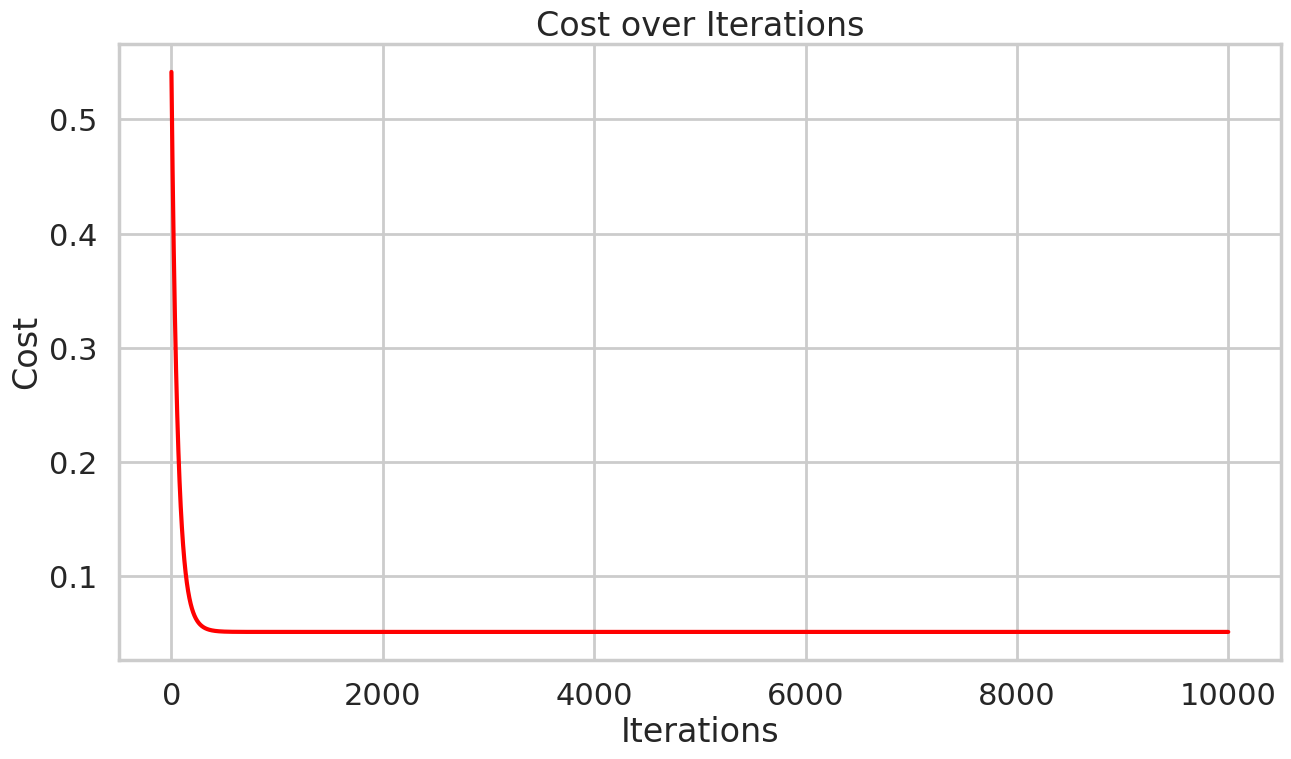

In [125]:
#### Visualization of the cost over the iterations
def plot_costs(cost):
    plt.figure(figsize=(15, 8))
    plt.plot(cost, color = 'red')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()

#### learning rate and number of iterations
alpha = 0.01
iterations = 10000
weights = initialize_weights(x, random = True)

matrix_weight, matrix_cost = gradient_descent(x, y, weights, alpha, iterations)
plot_costs(matrix_cost)

### (8) Predict y train set and calculate cost

In [126]:
#### Predicts the output for the y_train
weights = initialize_weights(x_train, random = True)
y_hat_train = predict(x_train, weights)
df_y_hat_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})

# solves error between actual and predicted values
df_y_hat_train['Residual Values'] = df_y_hat_train['Actual Values'] - df_y_hat_train['Predicted Values']
df_y_hat_train.head(5)

,Actual Values,Predicted Values,Residual Values
9,-0.657617,0.191532,-0.849149
18,-0.523115,-0.549302,0.026186
55,1.859486,2.844165,-0.984679
75,-1.022693,1.813308,-2.836001
150,0.399182,1.788399,-1.389217


In [127]:
#### Calculates cost of the predicted values on train set
train_cost = compute_cost(x_train, y_train, weights)
print(f'The train cost is: {train_cost}')

The train cost is: 0.4259776511878418


Using the weights, if the train cost is still high and its performance can still be improved.

### (9) Predict Y for the test set and calculate cost

In [128]:
#### Predicts the output for the y_test
weights = initialize_weights(x_test, random = True)
y_hat_test = predict(x_test, weights)
df_y_hat_test = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_hat_test})

# solves error between actual and predicted values
df_y_hat_test['Residual Values'] = df_y_hat_test['Actual Values'] - df_y_hat_test['Predicted Values']
df_y_hat_test.head(5)

,Actual Values,Predicted Values,Residual Values
95,0.552898,1.712656,-1.159758
15,1.609697,2.786196,-1.176499
30,1.417551,1.544310,-0.126758
158,-1.291696,1.345501,-2.637197
128,2.051631,1.234432,0.817199


In [129]:
#### Calculates cost of the predicted values on train set
test_cost = compute_cost(x_test, y_test, weights)
print(f"Test cost is: {test_cost}")

Test cost is: 0.8467018562601649


With the test cost, we can test and compare the performance of the model

# Predicting the quantitative response y on the train set

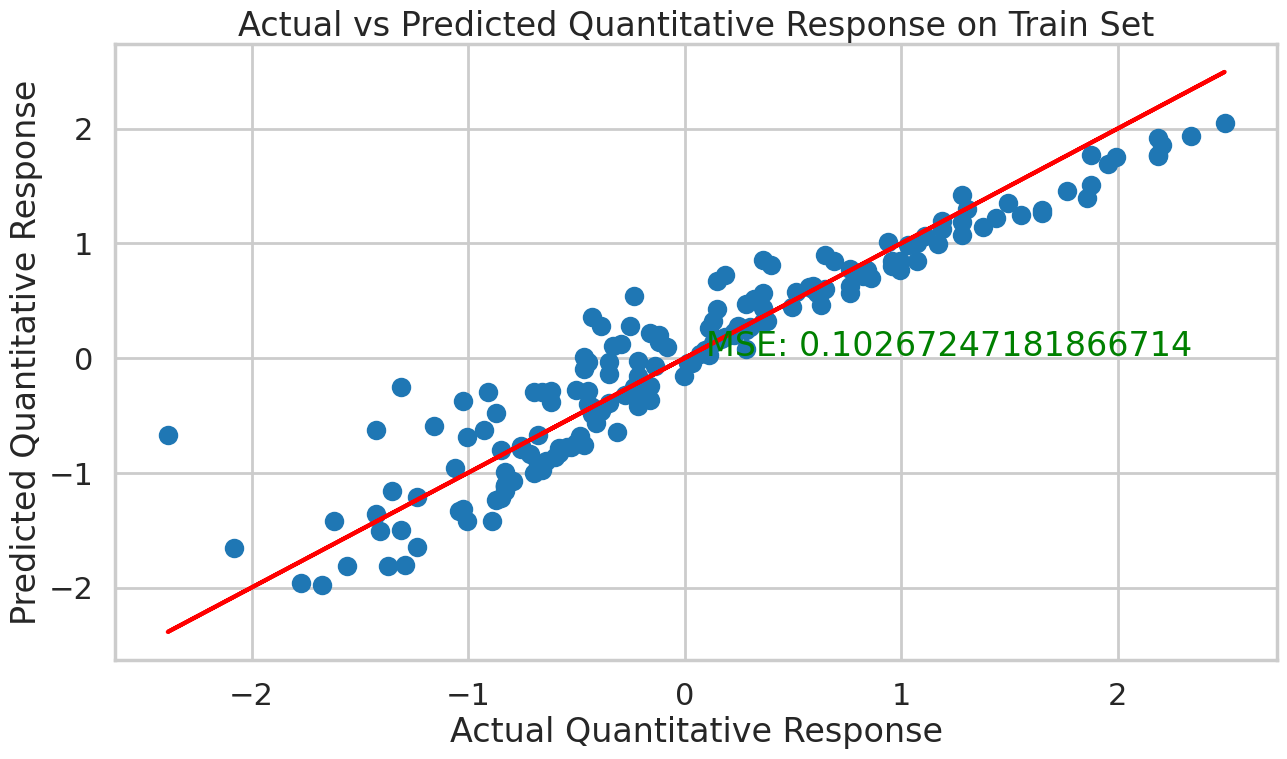

In [130]:
#### Performance evaluation and calculated MSE for train set
weights = initialize_weights(x_train, random = True)

# Initializing alpha and number of iterations
alpha = 0.01
iterations = 10000

# GD algorithm for training and test set
weights_training, cost_training = gradient_descent(x_train, y_train, weights, alpha, iterations)
weights_testing, cost_testing = gradient_descent(x_test, y_test, weights, alpha, iterations)

# Predicting quantitative response using the train set
y_hat_train = predict(x_train, weights_training[-1])

# Plot Visualizations
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual vs Predicted Quantitative Response on Train Set')
plt.scatter(y_train, y_hat_train)
plt.plot(y_train, y_train, color="red")

# Mean Squared Error
plt.text(0.10, 0.02, f"MSE: {mean_squared_error(y_train, y_hat_train)}", color='green')
plt.show()


Train set:                                  
The lower the MSE, the more accurate the model and much better its performance. With the calcualted MSE, the model has been a bit closer to 0

# Predicting the quantitative response y on the test set


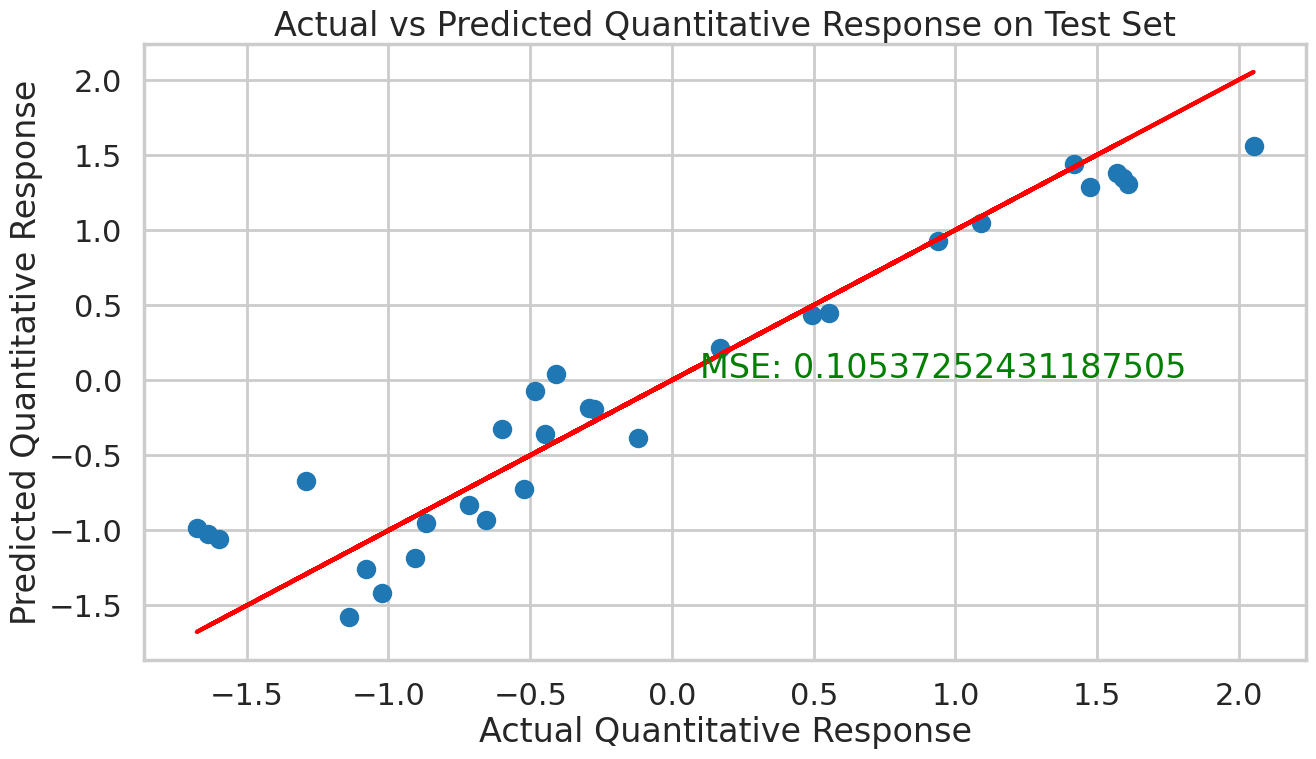

In [131]:
#### Performance evaluation and calculated MSE for test set

# Predicting quantitative response using the test set
y_hat_test = predict(x_test, weights_training[-1])

# Plot visualizations
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual vs Predicted Quantitative Response on Test Set')
plt.scatter(y_test, y_hat_test)
plt.plot(y_test, y_test, color="red")

# Mean Squared Error
plt.text(0.10, 0.02, f"MSE: {mean_squared_error(y_test, y_hat_test)}", color='green')
plt.show()

Test set:                                  
The lower the MSE, the more accurate the model and much better its performance. With the calcualted MSE, the model has been a bit closer to 0

## Reverts back the standadized data to its original form

In [132]:
## creates a copy on the standardized df
df_copy = df_std.copy()

df_copy.drop('bias', inplace=True, axis=1)

## reverting standardized data into the original form
df_copy['Sales'] = df_copy['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_copy['TV'] = df_copy['TV'] * df['TV'].std() + df['TV'].mean()
df_copy['Radio'] = df_copy['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_copy['Newspaper'] = df_copy['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()

df_copy.head(5)

,TV,Radio,Newspaper,Sales
0,230.308426,37.836477,69.296979,22.120270
1,44.242678,39.340241,45.136502,10.390910
2,16.874171,45.956803,69.397230,9.288149
3,151.511186,41.345260,58.570128,18.511236
4,180.884712,10.768723,58.469877,12.897183


# Plotting the cost over iterations for train and the test cost

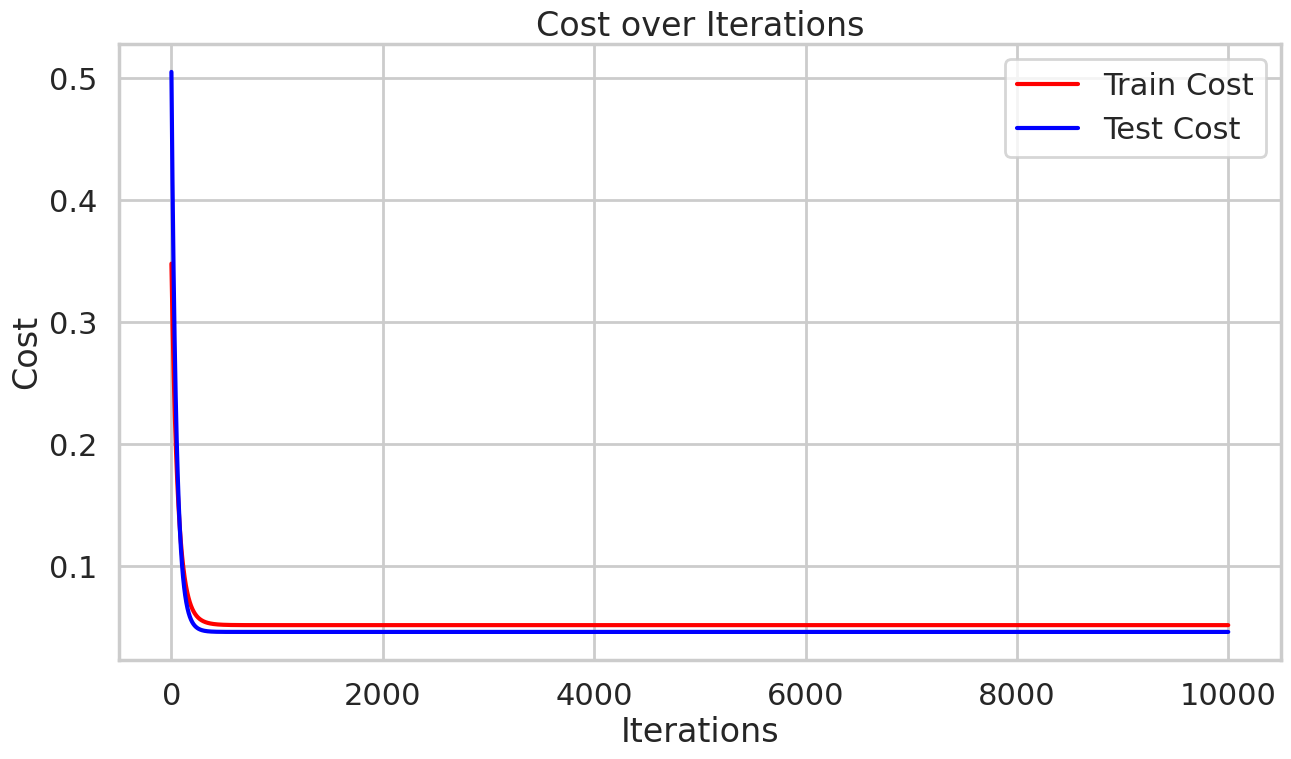

In [136]:
plt.figure(figsize=(15,8))
plt.plot(cost_training, label='Train Cost',  color='red')
plt.plot(cost_testing, label='Test Cost',  color='blue')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

The plot shows that the cost function decreases as iterations increase, indicating that the model becomes more accurate with more iterations, and the cost value decreases gradually.

# Answering the Questions

#### Q1. Optimal weights found by implemented gradient descent

In [137]:
#### Identify the optimal weights and apply to the model
# initial weights as zero
init_weight = initialize_weights(x_train)

# Learning rate & no. iterations
alpha = 0.01
iterations = 50000

# GDA implemention
weight, cost = gradient_descent(x_train, y_train, init_weight, alpha, iterations)

# Obtaining optimal weights for the model
opt_weights = weight[-1]


print(f"Optimal Weights: {opt_weights}")

#Optimal weights in the linear model w/ the features
print(f"H(x) = {opt_weights[0]} + {opt_weights[1]}*TV + {opt_weights[2]}*Radio + {opt_weights[3]}*Newspaper")

Optimal Weights: [4.36682560e-04 7.37383146e-01 5.36307180e-01 3.14254020e-03]
H(x) = 0.0004366825600856342 + 0.7373831463876052*TV + 0.5363071798482778*Radio + 0.0031425402008189904*Newspaper


## Q2. Show scatter plot of the predicted and actual for train and test set

### [Train Set]

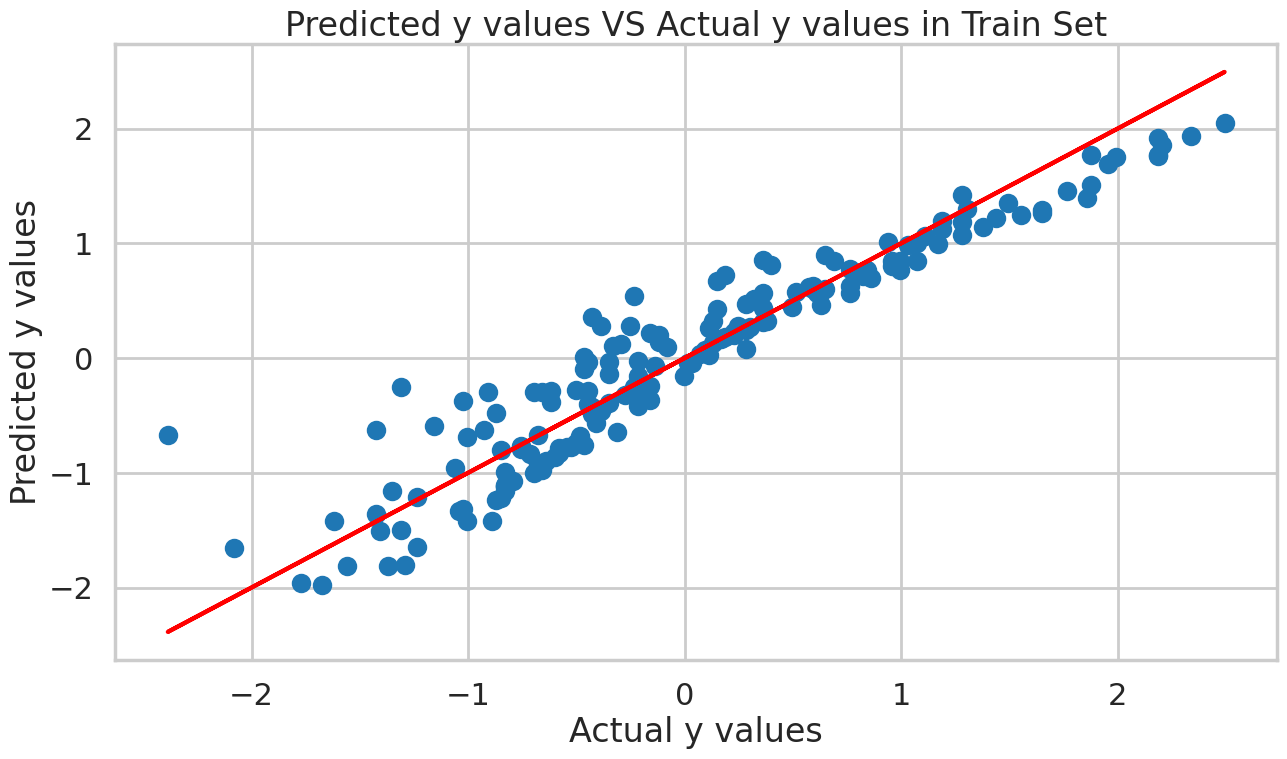

In [138]:
#### Visualizing actual y values VS predicted y values in the train set
predict_training = predict(x_train, opt_weights)
plt.figure(figsize=(15,8))
plt.scatter(y_train, predict_training)
plt.title('Predicted y values VS Actual y values in Train Set')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.plot(y_train, y_train, color='red')
plt.show()

In [141]:
#### getting the r2 score of the train set
print(f"TRAIN SET r2 score: {r2_score(y_train, predict_training)}")

TRAIN SET r2 score: 0.8936793584593188


### [Test Set]

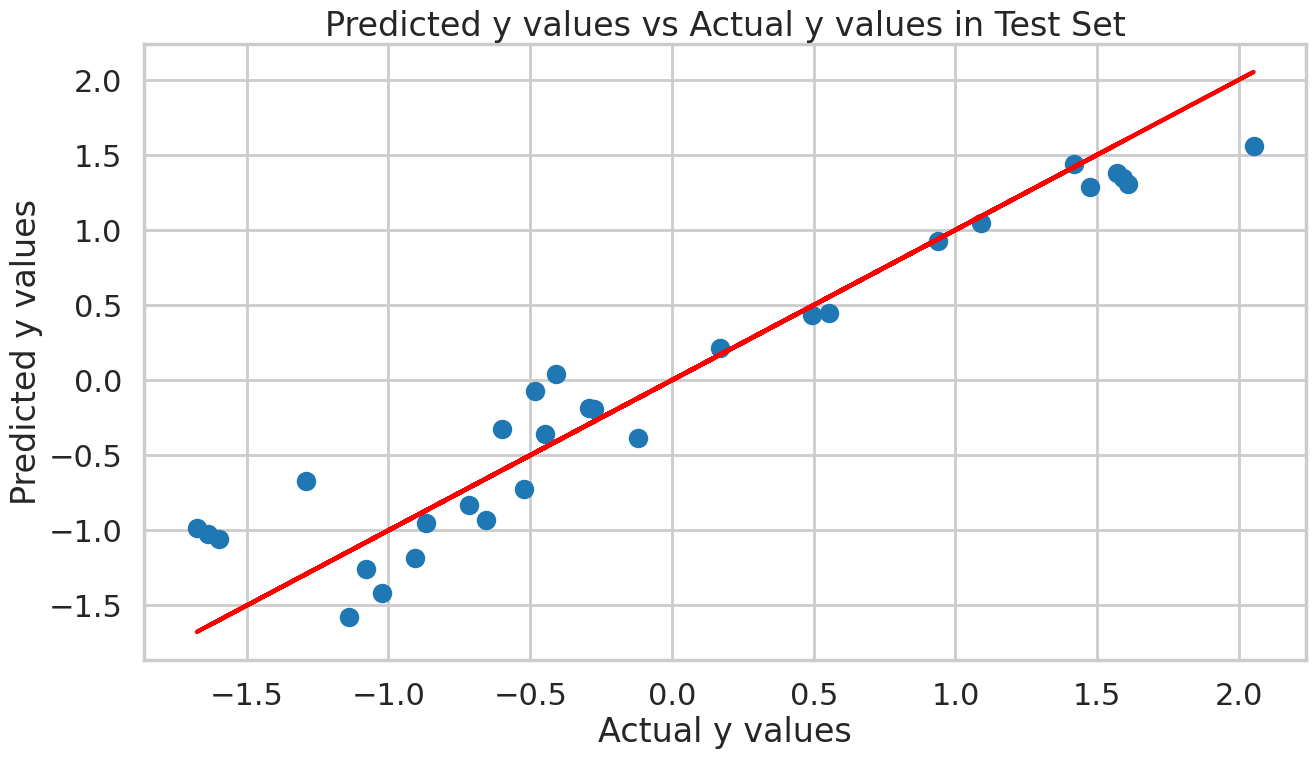

In [142]:
#### Visualizing actual y values VS predicted y values in the test set
predict_testing = predict(x_test, opt_weights)
plt.figure(figsize=(15,8))
plt.scatter(y_test, predict_testing)
plt.title('Predicted y values vs Actual y values in Test Set')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.plot(y_test, y_test, color='red')
plt.show()

In [143]:
#r2 score of the test set
print(f"TEST SET r2 score: {r2_score(y_test, predict_testing)}")

TEST SET r2 score: 0.9110275702091721


## Q3. What happens to the error, r2, and cost as the number of iterations increase? Show data an  proof.

### [ERROR]

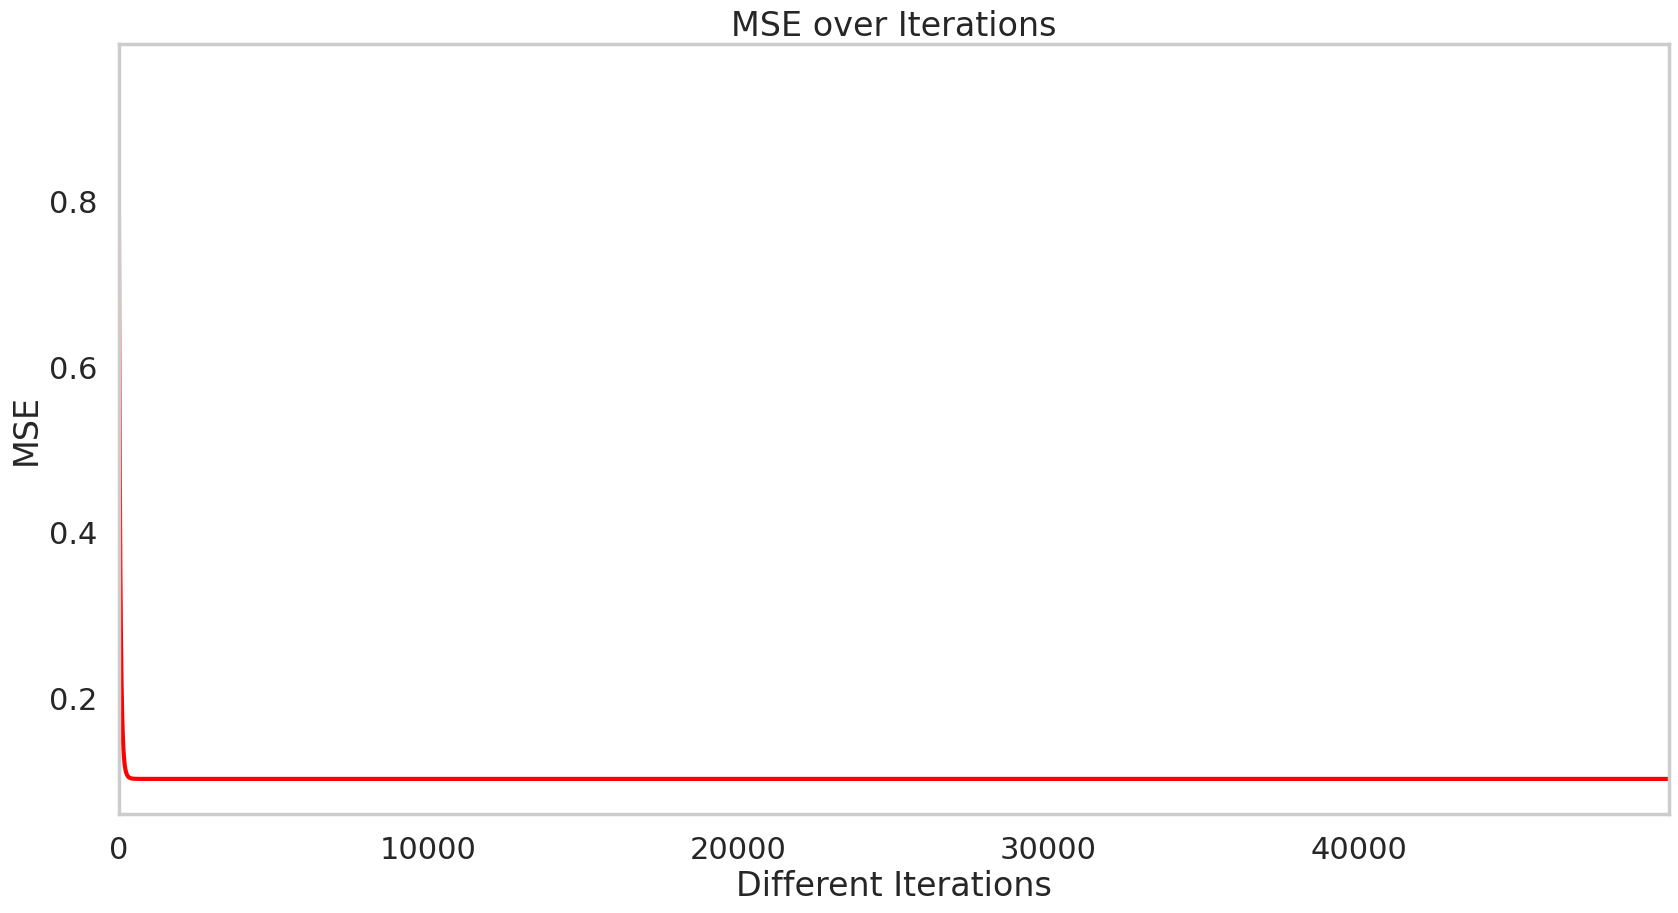

In [145]:
#### MSE calculations for the MSE for each iterations
#Utilizing sklearn
MSE_array = []
for iter in range(iterations):
    solve_MSE = mean_squared_error(y_train, predict(x_train, weight[iter]))
    MSE_array.append(solve_MSE)

#Plt Visualization
plt.figure(figsize=(20,10))
plt.plot(MSE_array, color = 'red')
plt.title('MSE over Iterations')
plt.xlabel('Different Iterations')
plt.ylabel('MSE')
plt.xlim(0, iterations)
plt.xticks(np.arange(0, iterations, 10000))
plt.grid()
plt.show()

### [R2 SCORE]

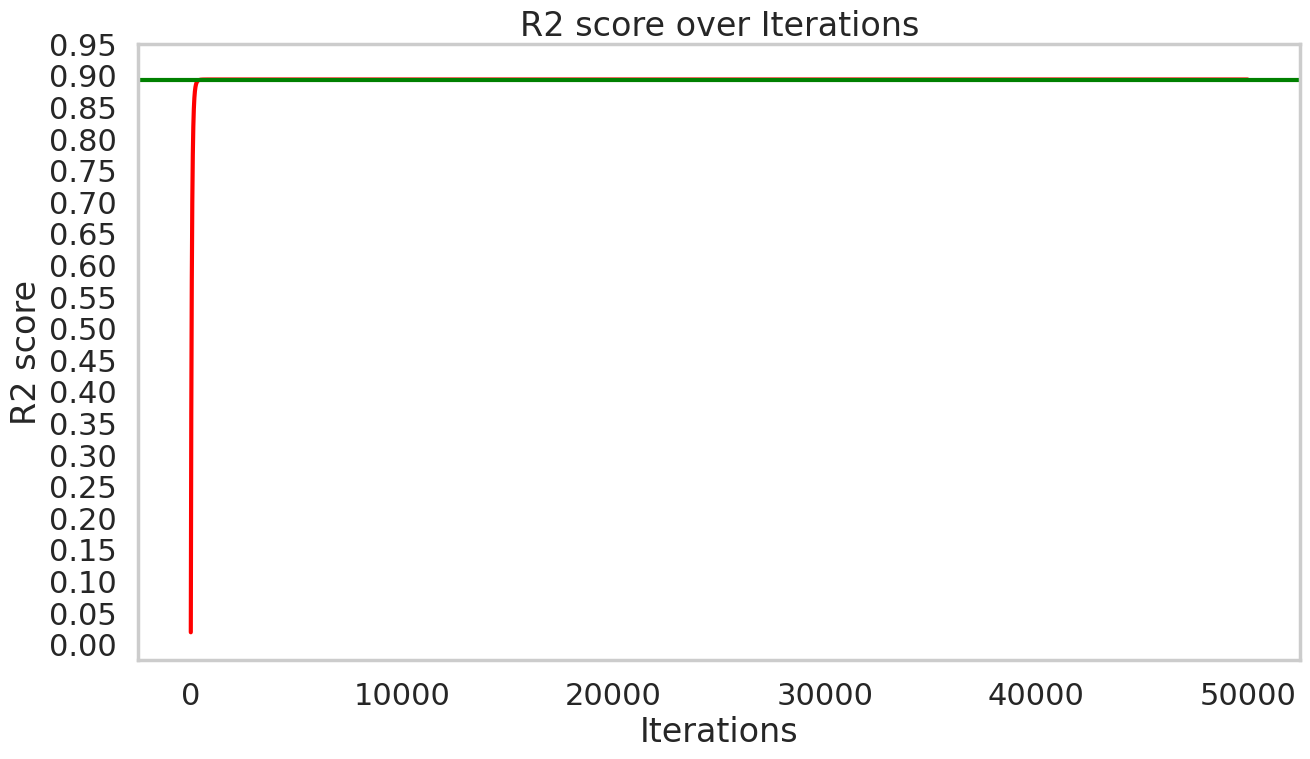

Max r^2 score: 0.8936793584593189


In [147]:
#### R2 score calculation for every iteration
r2_array = []
for iter in range(iterations):
    solve_r2 = r2_score(y_train, predict(x_train, weight[iter]))
    r2_array.append(solve_r2)

#Plotting it
plt.figure(figsize=(15,8))
plt.plot(r2_array, color = 'red')
plt.title('R2 score over Iterations')
plt.xlabel('Iterations')
plt.ylabel('R2 score')

plt.yticks(np.arange(0, 1, 0.05))

# Determining maximum r2 score
plt.axhline(y=max(r2_array), color='green')
plt.grid()
plt.show()

print(f"Max r^2 score: {max(r2_array)}")

### [COST]

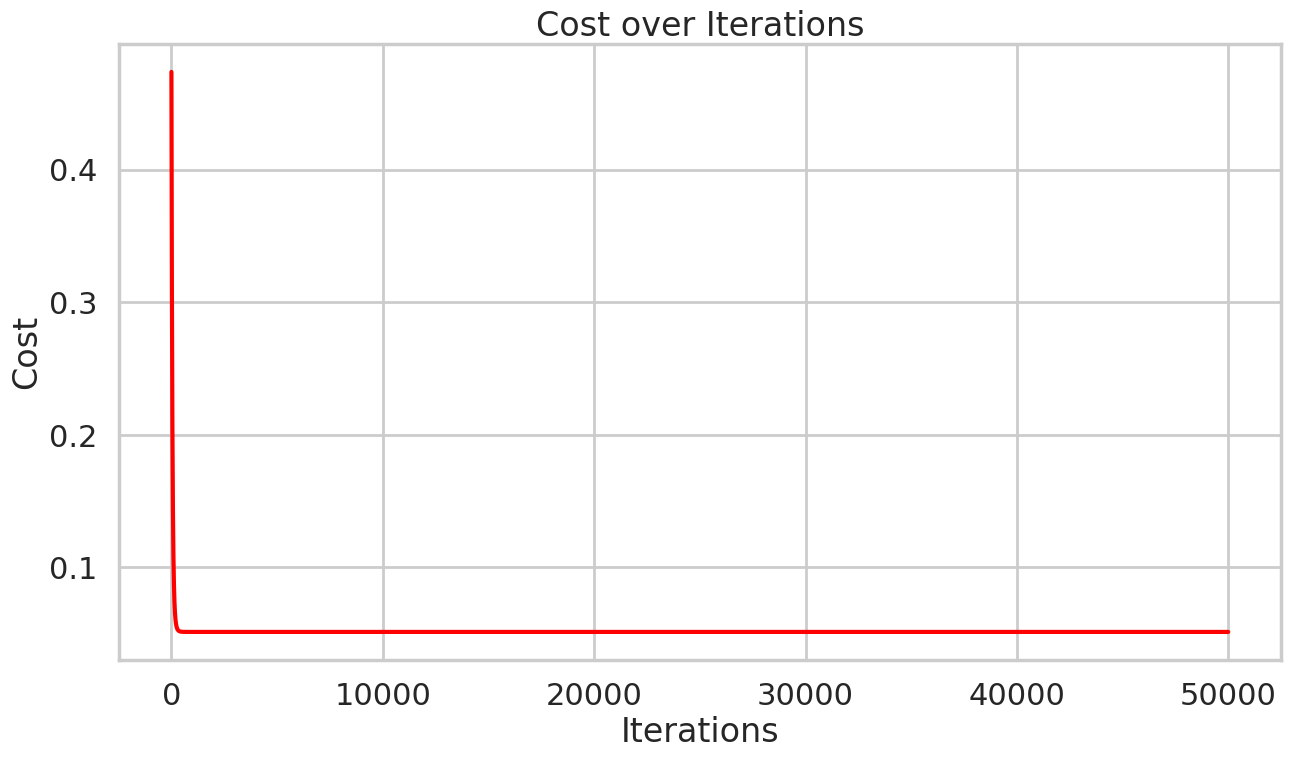

In [150]:
#### Visualizing the cost over iterations
plot_costs(cost)

In [151]:
#### Identifying optimal number of iterations
def optimal_iterations(r2_max, r2_array):
    for iter in range(len(r2_array)):
        if r2_array[iter] == r2_max:
            return iter

opt_number = optimal_iterations(max(r2_array), r2_array)
print(f"Optimal number of iterations: {opt_number}")


Optimal number of iterations: 3212


In [153]:
#### Displaying cost, weights at the optimal number of iterations
print(f"Optimal number of iterations cost: {cost[opt_number]}")
print(f"Optimal number of iterations weights: {weight[opt_number]}\n")

# Checking cost weight at the last iteration
print(f"50000th iteration cost: {cost[-1]}")
print(f"50000th iteration weight{weight[-1]}")

Optimal number of iterations cost: 0.05133623590933356
Optimal number of iterations weights: [4.36682585e-04 7.37383146e-01 5.36307178e-01 3.14254192e-03]

50000th iteration cost: 0.05133623590933357
50000th iteration weight[4.36682560e-04 7.37383146e-01 5.36307180e-01 3.14254020e-03]


In [157]:

df_metrics = pd.DataFrame({'Iteration': list(range(iterations)),'R2 Score': r2_array,
                           'MSE': MSE_array,'Cost': cost
})
df_metrics.head(5)

,Iteration,R2 Score,MSE,Cost
0,0,0.019144,0.947200,0.473600
1,1,0.038126,0.928869,0.464434
2,2,0.056679,0.910953,0.455476
3,3,0.074813,0.893441,0.446720
4,4,0.092538,0.876324,0.438162


The summary shows:

R2 - displays that the R2 score increases as the number of iterations increase;

MSE - the MSE decreases as the number of iterations increases

Cost - cost also decreases as the iterations increases


Therefore, we cans say that the model is somewhat on track  and improves its performance

# [Optimizing GDA] based on a threshold

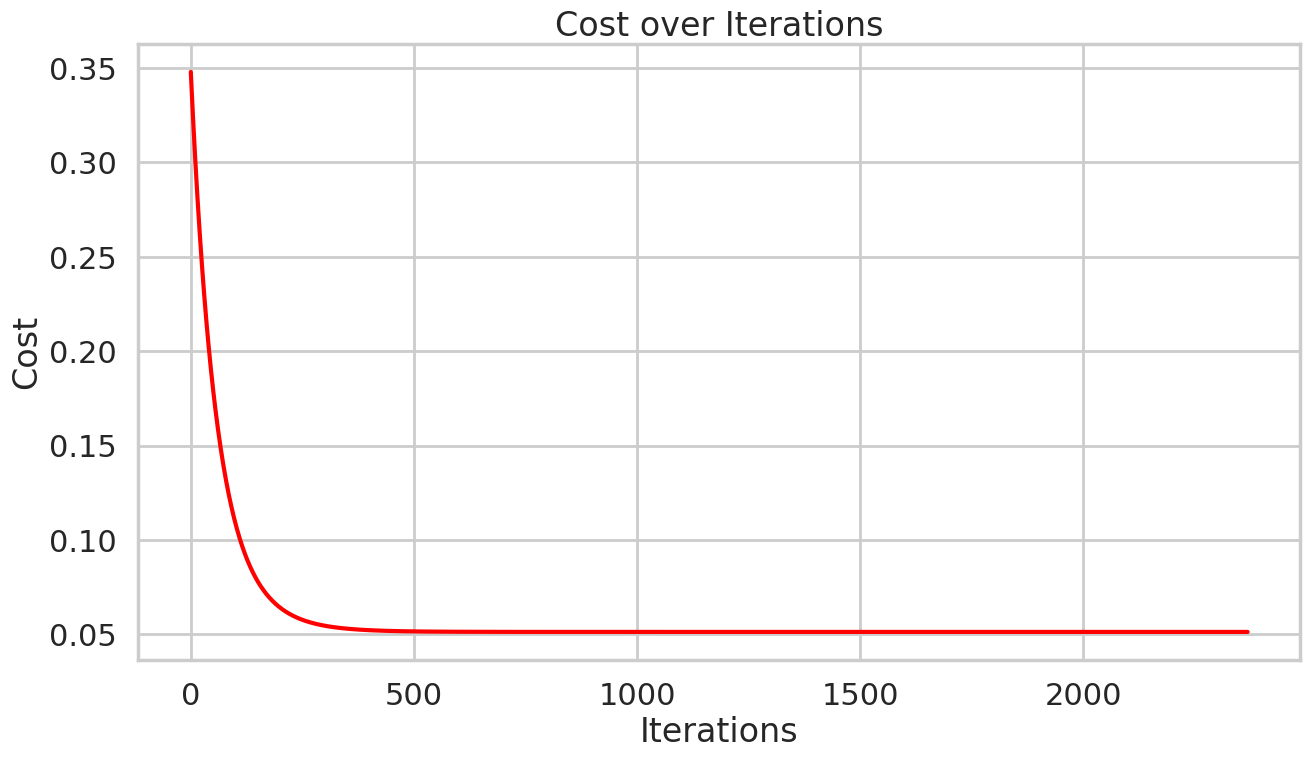

In [158]:
# Optimized Gradient Descent Algorithm
# Determining when to stop when the model is no longer making significant improvements
def optimized_gda(x, y, weights, alpha, iterations, thresholds):
    last_iteration = 0
    weight = []
    cost = []

    for iter in range(iterations):
        weights = update_weights(x, y, weights, alpha)
        weight.append(weights)

        # Cost computation
        current_cost = compute_cost(x, y, weights)
        cost.append(current_cost)

        # Checks the difference in cost between iterations is less than the threshold
        if iter > 0 and abs(cost[iter] - cost[iter - 1]) < thresholds:
            last_iteration = iter
            break

        last_iteration = iter

    return weight, cost, last_iteration

# Parameters
iterations = 50000
alpha = 0.01
thresholds = 1.0e-15


weight, cost, optimal_iterations = optimized_gda(x_train, y_train, weights, alpha, iterations, thresholds)

# Plot visualizations
plot_costs(cost)


## Q4.Check the effect on the cost and error as you change the learning rate.

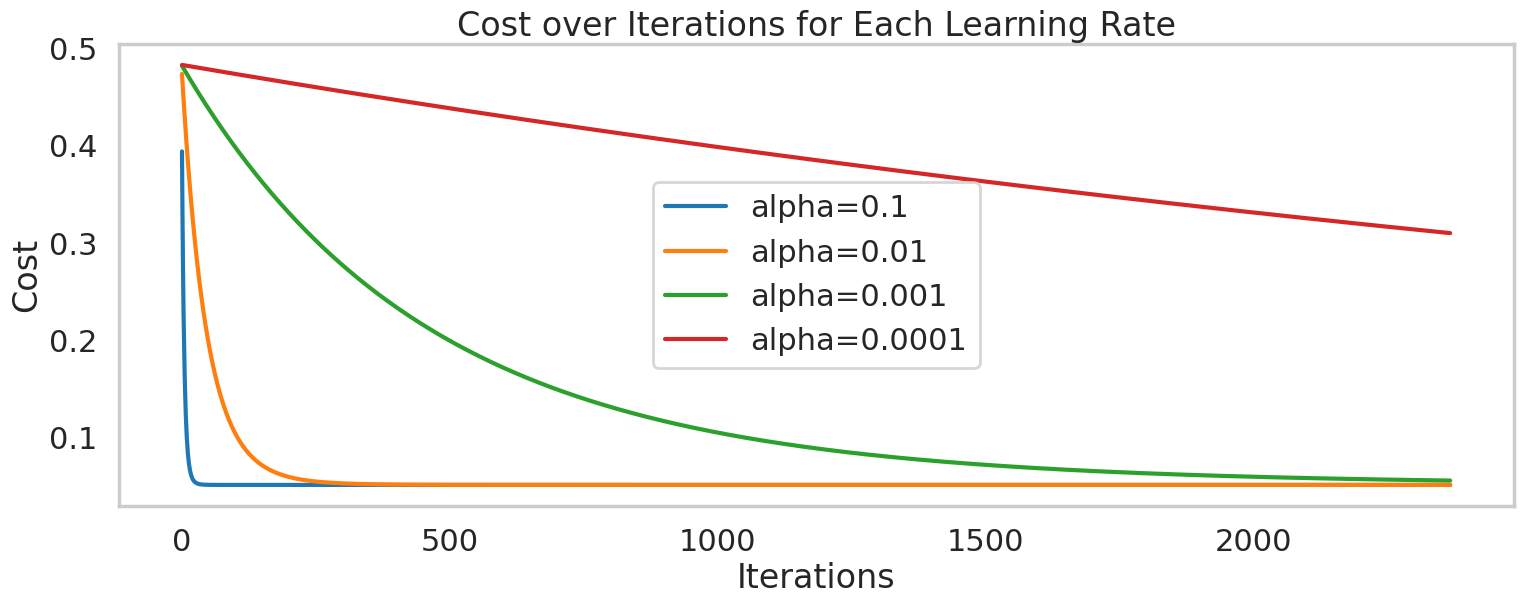

In [162]:
#### Utilizes different learning weights

# Initialize weights, set iterations, and define learning rates
weights = initialize_weights(x_train)
iterations = optimal_iterations
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Prepare dictionaries to store cost and error for each learning rate
cost_dict = {alpha: 0 for alpha in learning_rates}
error_dict = {alpha: 0 for alpha in learning_rates}
cost_iterations_dict = {alpha: [] for alpha in learning_rates}  # Keeps track of costs over iterations

# Iterates with different LR and GDA implementation
for alpha in learning_rates:
    updated_weights, costs = gradient_descent(x_train, y_train, weights, alpha, iterations)

    # Store the final cost for each learning rate
    cost_dict[alpha] = costs[-1]

    # Calculate error using mean squared error for the predictions with the latest weights
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(x_train, updated_weights[-1]))

    cost_iterations_dict[alpha] = costs

# Visualize the cost over iterations for each learning rate
plt.figure(figsize=(18, 6))
for alpha in learning_rates:
    plt.plot(cost_iterations_dict[alpha], label=f"alpha={alpha}")
plt.title('Cost over Iterations for Each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()


## Visualizing the learning rates and cost summary

In [163]:
learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'Error': list(error_dict.values())})
learning_rates

,Learning Rate,Cost,Error
0,0.1000,0.051336,0.102672
1,0.0100,0.051336,0.102672
2,0.0010,0.055819,0.111638
3,0.0001,0.310073,0.620147


# Q5. Is there a relationship on the learning rate and the number of iterations?

Learning rate that is too low can lead to slow convergence, requiring more iterations to reach the minimum cost example is 0.0001. Thus, choosing an appropriate learning rate should be taken into consideration for optimizing the training process and minimizing the model's error in which it drastically increases by 0.620 when the learning rate was 0.0001 [which is the smalles lr in the array]

The main takeaway is we cannot risk too low LR due to possible of effect of convergence and overshooting when the case is that LR is too high. It would require trial and error and also ensure the viable LR suitable for your purpose in the study

# Q6. Compare the results with the results of ordinary least squares function.

In [165]:
#### Result comparison with the OLS and the GDA

# Initializing and fiting the model
OLS = LinearRegression()
OLS.fit(x_train, y_train)

# Getting the  coefficients
ols_coefficients = OLS.coef_

# R² score OLS & GDA
OLS_R2 = r2_score(y_train, OLS.predict(x_train))
GDA_R2 = r2_array[-1]

# Results
print(f"OLS: {OLS_R2}")
print(f"GDA: {GDA_R2}")


OLS: 0.8936793584593188
GDA: 0.8936793584593188


We can observe that the OLS and GDA has similar R2 value, thus, we can say that the two matches and both methods can be used to fit the data well